<a href="https://colab.research.google.com/github/sravangvm/Covid-Classification-and-Segmentation-Using-X-Rays/blob/main/Covid_Xray_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
! cp kaggle.json ~/.kaggle/

In [22]:
! chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset

 99% 1.18G/1.19G [00:36<00:00, 51.9MB/s]
100% 1.19G/1.19G [00:36<00:00, 34.7MB/s]


In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
!wget https://github.com/ieee8023/covid-chestxray-dataset/blob/master/metadata.csv

--2022-08-11 05:31:00--  https://github.com/ieee8023/covid-chestxray-dataset/blob/master/metadata.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘metadata.csv’

metadata.csv            [ <=>                ] 952.74K  --.-KB/s    in 0.04s   

2022-08-11 05:31:00 (24.9 MB/s) - ‘metadata.csv’ saved [975609]



In [26]:
!wget https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip

--2022-08-11 05:31:00--  https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master [following]
--2022-08-11 05:31:01--  https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ] 525.03M  17.4MB/s    in 32s     

2022-08-11 05:31:32 (16.6 MB/s) - ‘master.zip’ saved [550535079]



In [27]:
!unzip /content/coronahack-chest-xraydataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0446-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0447-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0448-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0449-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0450-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0451-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0452-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001-0002.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack

In [28]:
!unzip /content/master.zip

Archive:  /content/master.zip
78543292f8b01d5e0ed1d0e15dce71949f0657bb
   creating: covid-chestxray-dataset-master/
   creating: covid-chestxray-dataset-master/.github/
 extracting: covid-chestxray-dataset-master/.github/FUNDING.yml  
   creating: covid-chestxray-dataset-master/.github/workflows/
  inflating: covid-chestxray-dataset-master/.github/workflows/tests.yml  
  inflating: covid-chestxray-dataset-master/.gitignore  
  inflating: covid-chestxray-dataset-master/README.md  
  inflating: covid-chestxray-dataset-master/SCHEMA.md  
   creating: covid-chestxray-dataset-master/annotations/
  inflating: covid-chestxray-dataset-master/annotations/covid-severity-scores.csv  
  inflating: covid-chestxray-dataset-master/annotations/imageannotation_ai_lung_bounding_boxes.json  
   creating: covid-chestxray-dataset-master/annotations/lungVAE-masks/
  inflating: covid-chestxray-dataset-master/annotations/lungVAE-masks/1-s2.0-S0140673620303706-fx1_lrg_mask.png  
  inflating: covid-chestxray-da

In [29]:
import pandas as pd
import os
import numpy as np

datapath1='covid-chestxray-dataset-master'
dataset_path='/content/gdrive/MyDrive/dataset'
  
categories=os.listdir(dataset_path)
print(categories)

dataset=pd.read_csv(os.path.join(datapath1,'metadata.csv'))
findings=dataset['finding']
image_names=dataset['filename']

['Covid19 Negative', 'Covid19 Positive']


In [30]:
positives_index=np.concatenate((np.where(findings=='COVID-19')[0],np.where(findings=='SARS')[0]))
positive_image_names=image_names[positives_index]
import cv2

for positive_image_name in positive_image_names:
    image=cv2.imread(os.path.join(datapath1,'images',positive_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[1],positive_image_name),image)
    except Exception as e:
        print(e)

In [31]:
dataset=pd.read_csv("/content/Chest_xray_Corona_Metadata.csv")
findings=dataset['Label']
image_names=dataset['X_ray_image_name']

In [32]:
negative_index=np.where(findings=='Normal')[0]
negative_image_names=image_names[negative_index]
for negative_image_name in negative_image_names:
    image=cv2.imread(os.path.join('images',negative_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[0],negative_image_name),image)
    except Exception as e:
        print(e)
      

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: erro

In [33]:
import cv2,os

data_path='/content/gdrive/MyDrive/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Covid19 Negative': 0, 'Covid19 Positive': 1}
['Covid19 Negative', 'Covid19 Positive']
[0, 1]


In [34]:
img_size=100
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.

In [35]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)
np.save('data',data)
np.save('target',new_target)

In [36]:
data=np.load('data.npy')
target=np.load('target.npy')

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [39]:
from keras.callbacks import *
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
18/18 [==============================] - 13s 55ms/step - loss: 0.5974 - accuracy: 0.7731 - val_loss: 0.5443 - val_accuracy: 0.7903
Epoch 2/20
18/18 [==============================] - 0s 28ms/step - loss: 0.5092 - accuracy: 0.7895 - val_loss: 0.4020 - val_accuracy: 0.8226
Epoch 3/20
18/18 [==============================] - 1s 28ms/step - loss: 0.4478 - accuracy: 0.8367 - val_loss: 0.3014 - val_accuracy: 0.8871
Epoch 4/20
18/18 [==============================] - 1s 31ms/step - loss: 0.4002 - accuracy: 0.8730 - val_loss: 0.2884 - val_accuracy: 0.9355
Epoch 5/20
18/18 [==============================] - 0s 28ms/step - loss: 0.3606 - accuracy: 0.8929 - val_loss: 0.2648 - val_accuracy: 0.9194
Epoch 6/20
18/18 [==============================] - 1s 30ms/step - loss: 0.4165 - accuracy: 0.8639 - val_loss: 0.2413 - val_accuracy: 0.9194
Epoch 7/20
18/18 [==============================] - 0s 20ms/step - loss: 0.3889 - accuracy: 0.8766 - val_loss: 0.3585 - val_accuracy: 0.8548
Epoch 8/20
1

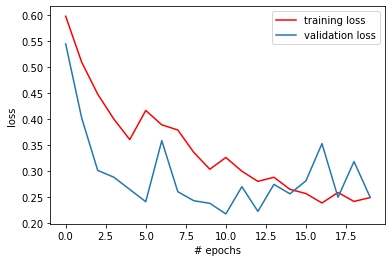

In [40]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

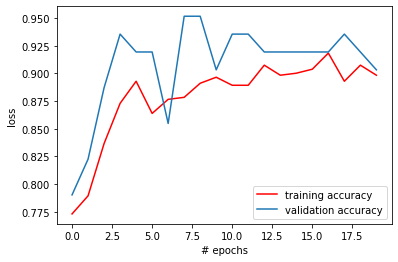

In [41]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
model.evaluate(test_data,test_target)

3/3 [==============================] - 0s 10ms/step - loss: 0.2231 - accuracy: 0.9420


[0.22310900688171387, 0.9420289993286133]

In [51]:
model.save('model.h5')

In [53]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>